# Version 5

No. of images: 2275 ; resolution: 128x128 ; batch size: 32 ; epochs: 10

In [ ]:
!ls /datasets/brabathon

!ls /datasets/brabathon/team_3
!ls /datasets/brabathon/team_3/test

'Challenge 5 - Team 3 - Pitch.desktop'	 team_3
 foo.txt				 Untitled0.ipynb
'Introduction to Deep Learning'		 Untitled1.ipynb
 mame					 Untitled2.ipynb
 model_label_2_v16.ipynb
test  train
example_output	Input


In [ ]:
!pip install scikit-image

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Display pic

In [ ]:
import numpy as np
import skimage
from skimage import io

path = "../../../datasets/brabathon/team_3/train/Input/"

img = io.imread(f'{path}0000.png')

print(img.shape)
print(np.max(img))

(960, 960)
57468


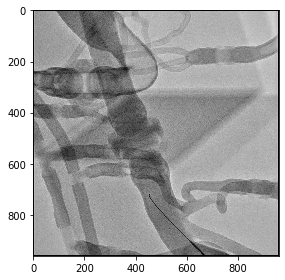

In [ ]:
io.imshow(img)

In [ ]:
pip install scikit-image

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
im_width = 128
im_height = 128
border = 5

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json


In [ ]:
from ipywidgets import FloatProgress


In [ ]:
pip install ipywidgets==7.4.2

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
path = "../../../datasets/brabathon/team_3/train/Input/"
ids = next(os.walk(path))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  2275


In [ ]:
path_out_1 = "../../../datasets/brabathon/team_3/train/Label1/"
ids_1 = next(os.walk(path_out_1))[2] # list of names all images in the given path
print("No. of images = ", len(ids_1))

No. of images =  2275


In [ ]:
X = np.zeros((2275, im_height, im_width, 1), dtype=np.float32)
y = np.zeros((2275, im_height, im_width, 1), dtype=np.float32)


In [ ]:
# Sorting the input - label 1 in the same order for them to match

ids

new_ids_1 = []

for image in ids:
    if image in ids_1:
        new_ids_1.append(image)

print(ids) # input
print(new_ids_1) # label 1

['0273.png', '0269.png', '1340.png', '0631.png', '2174.png', '0761.png', '0389.png', '0674.png', '0607.png', '0846.png', '0827.png', '0986.png', '0852.png', '1291.png', '0379.png', '0349.png', '1486.png', '1028.png', '1108.png', '1102.png', '1373.png', '0382.png', '1514.png', '0301.png', '2089.png', '1732.png', '0494.png', '0672.png', '0615.png', '1483.png', '0572.png', '0694.png', '1465.png', '0418.png', '1538.png', '1675.png', '0526.png', '2191.png', '0849.png', '1800.png', '0542.png', '1194.png', '0586.png', '0687.png', '0959.png', '2217.png', '1308.png', '2152.png', '0539.png', '0739.png', '1609.png', '0622.png', '0800.png', '1062.png', '1684.png', '1276.png', '0733.png', '0344.png', '1123.png', '2110.png', '0329.png', '1873.png', '1718.png', '1163.png', '0100.png', '0430.png', '1494.png', '1835.png', '0402.png', '0831.png', '0347.png', '0362.png', '1967.png', '1206.png', '1540.png', '1283.png', '1077.png', '1662.png', '0868.png', '0119.png', '1111.png', '1197.png', '1453.png', '00

In [ ]:
y_2 = np.zeros((2275, im_height, im_width, 1), dtype=np.float32)

In [ ]:
ids_1 = new_ids_1[:2275] # just take the first 2275 label 1 to try out
print(ids_1)

# tqdm is used to display the progress bar
#for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
for n, id_ in tqdm_notebook(enumerate(ids_1), total=len(ids_1)): # just trying with first 2275 inputs - label 1 
    # Load images
    img = load_img(path+ids[n], grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
    # Load masks
    mask = img_to_array(load_img(path_out_1+new_ids_1[n], grayscale=True))
    mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
    # Save images
    X[n] = x_img
    y[n] = mask

['0273.png', '0269.png', '1340.png', '0631.png', '2174.png', '0761.png', '0389.png', '0674.png', '0607.png', '0846.png', '0827.png', '0986.png', '0852.png', '1291.png', '0379.png', '0349.png', '1486.png', '1028.png', '1108.png', '1102.png', '1373.png', '0382.png', '1514.png', '0301.png', '2089.png', '1732.png', '0494.png', '0672.png', '0615.png', '1483.png', '0572.png', '0694.png', '1465.png', '0418.png', '1538.png', '1675.png', '0526.png', '2191.png', '0849.png', '1800.png', '0542.png', '1194.png', '0586.png', '0687.png', '0959.png', '2217.png', '1308.png', '2152.png', '0539.png', '0739.png', '1609.png', '0622.png', '0800.png', '1062.png', '1684.png', '1276.png', '0733.png', '0344.png', '1123.png', '2110.png', '0329.png', '1873.png', '1718.png', '1163.png', '0100.png', '0430.png', '1494.png', '1835.png', '0402.png', '0831.png', '0347.png', '0362.png', '1967.png', '1206.png', '1540.png', '1283.png', '1077.png', '1662.png', '0868.png', '0119.png', '1111.png', '1197.png', '1453.png', '00

  0%|          | 0/2275 [00:00<?, ?it/s]

/shared-libs/python3.7/py/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
# Split train and valid for label 1
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X, y, test_size=0.1, random_state=42)

From here on it is only for label 1


In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [ ]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 16  160         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 128, 128, 16  64         ['conv2d_20[0][0]']              
 ormalization)                  )                                                           

In [ ]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model_test_label1_v5.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
results = model.fit(X_train_1, y_train_1, batch_size=32, epochs=10, callbacks=callbacks,\
                    validation_data=(X_valid_1, y_valid_1))

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: -15.7242 - precision_1: 0.0735 - recall: 0.9064
Epoch 1: val_loss improved from inf to -9.53909, saving model to model_test_label1_v5.h5
64/64 [==============================] - 446s 7s/step - loss: -15.7242 - precision_1: 0.0735 - recall: 0.9064 - val_loss: -9.5391 - val_precision_1: 0.1615 - val_recall: 0.4987 - lr: 0.0010
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: -30.6819 - precision_1: 0.3059 - recall: 0.7203
Epoch 2: val_loss improved from -9.53909 to -38.81224, saving model to model_test_label1_v5.h5
64/64 [==============================] - 452s 7s/step - loss: -30.6819 - precision_1: 0.3059 - recall: 0.7203 - val_loss: -38.8122 - val_precision_1: 0.1829 - val_recall: 0.7024 - lr: 0.0010
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: -40.3101 - precision_1: 0.4997 - recall: 0.7396
Epoch 3: val_loss improved from -38.81224 to -53.92134, saving model to model_test_labe

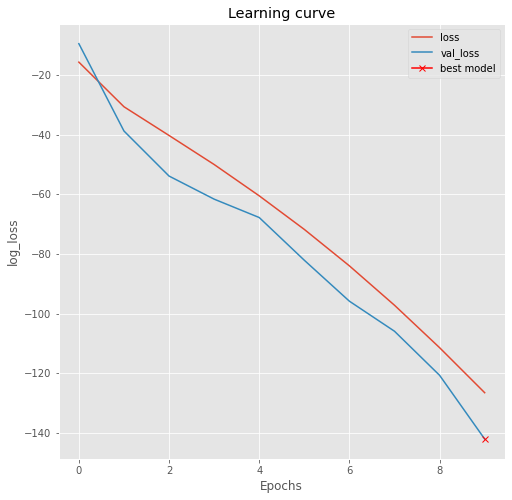

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
# load the best model
model.load_weights('model_test_label1_v5.h5')

In [ ]:
# Evaluate on validation set (this must be equal to the best log_loss)
model.evaluate(X_valid_1, y_valid_1, verbose=1)

8/8 [==============================] - 14s 2s/step - loss: -142.0869 - precision_1: 0.8502 - recall: 0.6628


[-142.08689880371094, 0.8502166271209717, 0.6627545952796936]

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train_1, verbose=1)
preds_val = model.predict(X_valid_1, verbose=1)

8/8 [==============================] - 11s 1s/step


In [ ]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [ ]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))
    print(ix)

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray') #seismic
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Input')

    ax[1].imshow(y[ix].squeeze(), cmap="gray")
    ax[1].set_title('Label 1')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1, cmap="gray")
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Label 1 Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1, cmap="gray")
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Label 1 Predicted binary');

In [ ]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))
    print(ix)

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray') #seismic
    # if has_mask:
    #     ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Original Picture')
    ax[0].axis("off");

    ax[1].imshow(y[ix].squeeze(), cmap="gray")
    ax[1].set_title('Catheter')
    ax[1].axis("off");

    # ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1, cmap="gray")
    # if has_mask:
    #     ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    # ax[2].set_title('Label 1 Predicted')
    
    # ax[2].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1, cmap="gray")
    # # if has_mask:
    # #     ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    # ax[2].set_title('Label 1 Predicted binary');

    ax[2].imshow(binary_opening(binary_preds[ix].squeeze()), cmap="gray")
    ax[2].set_title("Predicted Catheter")
    ax[2].axis("off")


In [ ]:
# Check if training data looks all right
plot_sample(X_train_1, y_train_1, preds_train, preds_train_t, ix=8)

NameError: name 'X_train_1' is not defined

1805


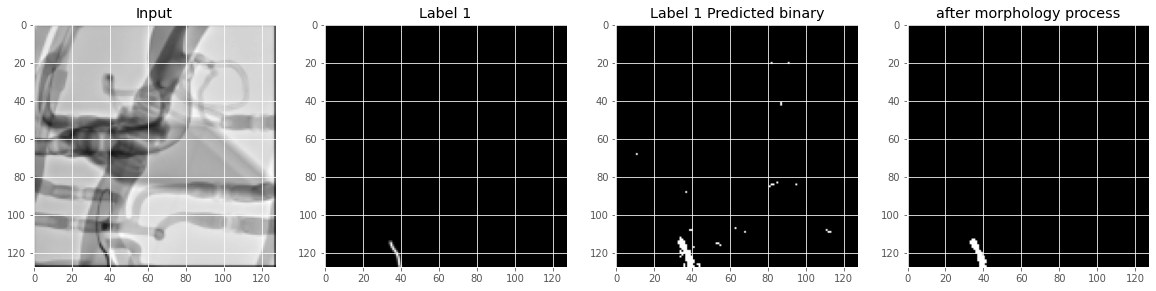

In [ ]:
plot_sample(X_train_1, y_train_1, preds_train, preds_train_t)


Predictions on test set

0


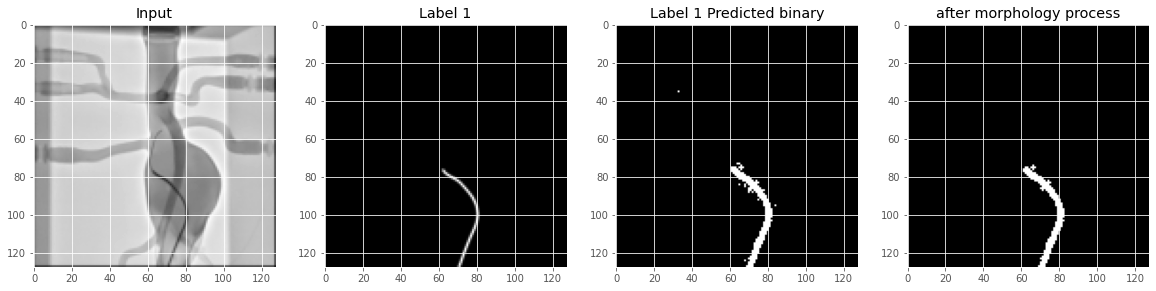

In [ ]:
# Check if valid data looks all right
plot_sample(X_valid_1, y_valid_1, preds_val, preds_val_t, ix=0)

In [ ]:
m = tf.keras.metrics.Precision()
m.update_state(y_valid_1[0], preds_val_t[0])
m.result().numpy()


0.9437751

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4144b7b9-3219-41a2-876d-aacb0b6eac8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>